In [1]:
print('********Part A, Data Prep; Approach One using BeautifulSoup and Current Day Prices********')

********Part A, Data Prep; Approach One using BeautifulSoup and Current Day Prices********


In [2]:
# import packages

import requests
import datetime
from bs4 import BeautifulSoup

In [3]:
# create current date and previous date timestamps

current_date = datetime.datetime.now()
print(current_date.date())

day = 1
previous_date = datetime.datetime(year=current_date.year, month=current_date.month, day=current_date.day-day)
print(previous_date.date())

2022-12-23
2022-12-22


In [4]:
# bringing url to python

stock = 'MSFT'
url_summary = 'https://finance.yahoo.com/quote/{}?p={}'
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
response = requests.get(url_summary.format(stock, stock), headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
print(response)
print(soup.prettify())

<Response [200]>
<!DOCTYPE html>
<html class="NoJs chrome desktop" data-color-theme="light" id="atomic" lang="en-US">
 <head prefix="og: https://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   Microsoft Corporation (MSFT) Stock Price, News, Quote &amp; History - Yahoo Finance
  </title>
  <meta content="MSFT, Microsoft Corporation, MSFT stock chart, Microsoft Corporation stock chart, stock chart, stocks, quotes, finance" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="458584288257241" property="fb:app_id"/>
  <meta content="#400090" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Find the latest Microsoft Corporation (MSFT) stock quote, history, news and other vital information to help you with your stock trading and in

In [5]:
# Find the HTML tag that contains the opening and closing day trading price
# (a 'td' tag in the HTML document with an attribute data-test whose value is OPEN-value)
# (a 'td' tag in the HTML document with an attribute data-test whose value is PREV_CLOSE-value), which is a current limitation for the analysis

open_price_tag = soup.find('td', {'data-test': 'OPEN-value'})
prev_close_price_tag = soup.find('td', {'data-test': 'PREV_CLOSE-value'})
beta_tag = soup.find('td', {'data-test': 'BETA_5Y-value'})

print(open_price_tag)
print(prev_close_price_tag)
print(beta_tag)

print(current_date.date())
print(previous_date.date())

<td class="Ta(end) Fw(600) Lh(14px)" data-test="OPEN-value">236.11</td>
<td class="Ta(end) Fw(600) Lh(14px)" data-test="PREV_CLOSE-value">238.19</td>
<td class="Ta(end) Fw(600) Lh(14px)" data-test="BETA_5Y-value">0.93</td>
2022-12-23
2022-12-22


In [6]:
# Extract both prices from the tag using text method 
# Extract the stock's beta using using text method 


open_price = open_price_tag.text
prev_close_price = prev_close_price_tag.text
beta = beta_tag.text

print('Opening Price as of', current_date.date(), 'for', stock,'is:', open_price)
print('Prev Closing Price as of', previous_date.date(), 'for', stock,'is:', prev_close_price)
print('The beta for', stock,'is:', beta)

Opening Price as of 2022-12-23 for MSFT is: 236.11
Prev Closing Price as of 2022-12-22 for MSFT is: 238.19
The beta for MSFT is: 0.93


In [7]:
# making dictionary and traverse it to show nicely.

x1 = {'Date as of:': current_date.date(), 'Opening price:': open_price}
x2 = {'Date as of:': previous_date.date(), 'Prev Closing price:': prev_close_price}

print(x1)
print('\n')

print(x2)
print('---------------------------------------')
print('\n')

for i in x1:
    print(i, x1[i])

print('\n')

for i in x2:
    print(i, x2[i])

{'Date as of:': datetime.date(2022, 12, 23), 'Opening price:': '236.11'}


{'Date as of:': datetime.date(2022, 12, 22), 'Prev Closing price:': '238.19'}
---------------------------------------


Date as of: 2022-12-23
Opening price: 236.11


Date as of: 2022-12-22
Prev Closing price: 238.19


In [8]:
print('********Part B, Data Analysis; Approach One using BeautifulSoup and Open/Prev Close Day Prices********')

********Part B, Data Analysis; Approach One using BeautifulSoup and Open/Prev Close Day Prices********


In [9]:
# calculate daily trading P&L difference
#Due to limitations with gathering the close_price, the daily_trading is calculating Prev Close trading P&L difference 

daily_trading = float(open_price) - float(prev_close_price)
print(daily_trading)

-2.079999999999984


In [10]:
# calculate daily trading P&L percentage
#Due to limitations with gathering the close_price, the daily_trading_pct is calculating Prev Close trading P&L percentage  

daily_trading_pct = (float(open_price) - float(prev_close_price)) / float(prev_close_price) *100
print(daily_trading_pct)

-0.8732524455266738


In [11]:
print('********Part A, Data Prep; Approach Two using Pandas and daily data********')

********Part A, Data Prep; Approach Two using Pandas and daily data********


In [12]:
# import packages
import pandas as pd

In [13]:
# calculate time interval

years = 5
dt = datetime.datetime.now()

past_date = datetime.datetime(year=dt.year-years, month=dt.month, day=dt.day)
print(dt.date())
print(past_date.date())

2022-12-23
2017-12-23


In [14]:
# specify stock
# send json payload to Yahoo Finance

stock = 'MSFT'
url = 'https://query1.finance.yahoo.com/v7/finance/chart/{}'
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
json_payload = {
'formatted': 'true',
'crumb': 'J2oUJNHQwXU',
'includeAdjustedClose': 'true',
'interval': '1d',
'period1': '%s' %int(past_date.timestamp()),
'period2': '%s' %int(dt.timestamp()),
'events': 'div|split',
'useYfid': 'true',
'corsDomain': 'finance.yahoo.com'}
print(json_payload)

{'formatted': 'true', 'crumb': 'J2oUJNHQwXU', 'includeAdjustedClose': 'true', 'interval': '1d', 'period1': '1514005200', 'period2': '1671832586', 'events': 'div|split', 'useYfid': 'true', 'corsDomain': 'finance.yahoo.com'}


In [15]:
# retrieve stock data for the json payload

jsonData = requests.get(url.format(stock), headers = headers, params = json_payload).json()
print(jsonData)

{'chart': {'result': [{'meta': {'currency': 'USD', 'symbol': 'MSFT', 'exchangeName': 'NMS', 'instrumentType': 'EQUITY', 'firstTradeDate': 511108200, 'regularMarketTime': 1671829204, 'gmtoffset': -18000, 'timezone': 'EST', 'exchangeTimezoneName': 'America/New_York', 'regularMarketPrice': 238.73, 'chartPreviousClose': 85.51, 'priceHint': 2, 'currentTradingPeriod': {'pre': {'timezone': 'EST', 'start': 1671786000, 'end': 1671805800, 'gmtoffset': -18000}, 'regular': {'timezone': 'EST', 'start': 1671805800, 'end': 1671829200, 'gmtoffset': -18000}, 'post': {'timezone': 'EST', 'start': 1671829200, 'end': 1671843600, 'gmtoffset': -18000}}, 'dataGranularity': '1d', 'range': '', 'validRanges': ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']}, 'timestamp': [1514298600, 1514385000, 1514471400, 1514557800, 1514903400, 1514989800, 1515076200, 1515162600, 1515421800, 1515508200, 1515594600, 1515681000, 1515767400, 1516113000, 1516199400, 1516285800, 1516372200, 1516631400, 151

In [16]:
# retrieve results from JSON request

result = jsonData['chart']['result'][0]
print(result)

{'meta': {'currency': 'USD', 'symbol': 'MSFT', 'exchangeName': 'NMS', 'instrumentType': 'EQUITY', 'firstTradeDate': 511108200, 'regularMarketTime': 1671829204, 'gmtoffset': -18000, 'timezone': 'EST', 'exchangeTimezoneName': 'America/New_York', 'regularMarketPrice': 238.73, 'chartPreviousClose': 85.51, 'priceHint': 2, 'currentTradingPeriod': {'pre': {'timezone': 'EST', 'start': 1671786000, 'end': 1671805800, 'gmtoffset': -18000}, 'regular': {'timezone': 'EST', 'start': 1671805800, 'end': 1671829200, 'gmtoffset': -18000}, 'post': {'timezone': 'EST', 'start': 1671829200, 'end': 1671843600, 'gmtoffset': -18000}}, 'dataGranularity': '1d', 'range': '', 'validRanges': ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']}, 'timestamp': [1514298600, 1514385000, 1514471400, 1514557800, 1514903400, 1514989800, 1515076200, 1515162600, 1515421800, 1515508200, 1515594600, 1515681000, 1515767400, 1516113000, 1516199400, 1516285800, 1516372200, 1516631400, 1516717800, 1516804200, 1

In [17]:
# retrieve key indicators from results

indicators = result['indicators']

print(indicators.keys()) #keys identified
print(indicators) #results

dict_keys(['quote', 'adjclose'])
{'quote': [{'close': [85.4000015258789, 85.70999908447266, 85.72000122070312, 85.54000091552734, 85.94999694824219, 86.3499984741211, 87.11000061035156, 88.19000244140625, 88.27999877929688, 88.22000122070312, 87.81999969482422, 88.08000183105469, 89.5999984741211, 88.3499984741211, 90.13999938964844, 90.0999984741211, 90.0, 91.61000061035156, 91.9000015258789, 91.81999969482422, 92.33000183105469, 94.05999755859375, 93.91999816894531, 92.73999786376953, 95.01000213623047, 94.26000213623047, 91.77999877929688, 88.0, 91.33000183105469, 89.61000061035156, 85.01000213623047, 88.18000030517578, 89.12999725341797, 89.83000183105469, 90.80999755859375, 92.66000366210938, 92.0, 92.72000122070312, 91.48999786376953, 91.7300033569336, 94.05999755859375, 95.41999816894531, 94.19999694824219, 93.7699966430664, 92.8499984741211, 93.05000305175781, 93.63999938964844, 93.31999969482422, 93.86000061035156, 94.43000030517578, 96.54000091552734, 96.7699966430664, 94.410

In [18]:
# create dictionary for timestamp rows

rows = {'timestamp':result['timestamp']}
print(rows)

{'timestamp': [1514298600, 1514385000, 1514471400, 1514557800, 1514903400, 1514989800, 1515076200, 1515162600, 1515421800, 1515508200, 1515594600, 1515681000, 1515767400, 1516113000, 1516199400, 1516285800, 1516372200, 1516631400, 1516717800, 1516804200, 1516890600, 1516977000, 1517236200, 1517322600, 1517409000, 1517495400, 1517581800, 1517841000, 1517927400, 1518013800, 1518100200, 1518186600, 1518445800, 1518532200, 1518618600, 1518705000, 1518791400, 1519137000, 1519223400, 1519309800, 1519396200, 1519655400, 1519741800, 1519828200, 1519914600, 1520001000, 1520260200, 1520346600, 1520433000, 1520519400, 1520605800, 1520861400, 1520947800, 1521034200, 1521120600, 1521207000, 1521466200, 1521552600, 1521639000, 1521725400, 1521811800, 1522071000, 1522157400, 1522243800, 1522330200, 1522675800, 1522762200, 1522848600, 1522935000, 1523021400, 1523280600, 1523367000, 1523453400, 1523539800, 1523626200, 1523885400, 1523971800, 1524058200, 1524144600, 1524231000, 1524490200, 1524576600, 1

In [19]:
# update dictionary for quote prices

rows.update(indicators['quote'][0])
print(rows)

{'timestamp': [1514298600, 1514385000, 1514471400, 1514557800, 1514903400, 1514989800, 1515076200, 1515162600, 1515421800, 1515508200, 1515594600, 1515681000, 1515767400, 1516113000, 1516199400, 1516285800, 1516372200, 1516631400, 1516717800, 1516804200, 1516890600, 1516977000, 1517236200, 1517322600, 1517409000, 1517495400, 1517581800, 1517841000, 1517927400, 1518013800, 1518100200, 1518186600, 1518445800, 1518532200, 1518618600, 1518705000, 1518791400, 1519137000, 1519223400, 1519309800, 1519396200, 1519655400, 1519741800, 1519828200, 1519914600, 1520001000, 1520260200, 1520346600, 1520433000, 1520519400, 1520605800, 1520861400, 1520947800, 1521034200, 1521120600, 1521207000, 1521466200, 1521552600, 1521639000, 1521725400, 1521811800, 1522071000, 1522157400, 1522243800, 1522330200, 1522675800, 1522762200, 1522848600, 1522935000, 1523021400, 1523280600, 1523367000, 1523453400, 1523539800, 1523626200, 1523885400, 1523971800, 1524058200, 1524144600, 1524231000, 1524490200, 1524576600, 1

In [20]:
# update dictionary for adj closing prices

rows.update(indicators['adjclose'][0])
print(rows)

{'timestamp': [1514298600, 1514385000, 1514471400, 1514557800, 1514903400, 1514989800, 1515076200, 1515162600, 1515421800, 1515508200, 1515594600, 1515681000, 1515767400, 1516113000, 1516199400, 1516285800, 1516372200, 1516631400, 1516717800, 1516804200, 1516890600, 1516977000, 1517236200, 1517322600, 1517409000, 1517495400, 1517581800, 1517841000, 1517927400, 1518013800, 1518100200, 1518186600, 1518445800, 1518532200, 1518618600, 1518705000, 1518791400, 1519137000, 1519223400, 1519309800, 1519396200, 1519655400, 1519741800, 1519828200, 1519914600, 1520001000, 1520260200, 1520346600, 1520433000, 1520519400, 1520605800, 1520861400, 1520947800, 1521034200, 1521120600, 1521207000, 1521466200, 1521552600, 1521639000, 1521725400, 1521811800, 1522071000, 1522157400, 1522243800, 1522330200, 1522675800, 1522762200, 1522848600, 1522935000, 1523021400, 1523280600, 1523367000, 1523453400, 1523539800, 1523626200, 1523885400, 1523971800, 1524058200, 1524144600, 1524231000, 1524490200, 1524576600, 1

In [21]:
# create dateframe for the data

df = pd.DataFrame(rows)
print(df)

       timestamp       close         low        open        high    volume  \
0     1514298600   85.400002   85.029999   85.309998   85.529999   9891200   
1     1514385000   85.709999   85.220001   85.650002   85.980003  14678000   
2     1514471400   85.720001   85.550003   85.900002   85.930000  10594300   
3     1514557800   85.540001   85.500000   85.629997   86.050003  18717400   
4     1514903400   85.949997   85.500000   86.129997   86.309998  22483800   
...          ...         ...         ...         ...         ...       ...   
1254  1671460200  240.449997  238.710007  244.860001  245.210007  29696400   
1255  1671546600  241.800003  238.419998  239.399994  242.910004  25150800   
1256  1671633000  244.429993  240.110001  241.690002  245.619995  23690600   
1257  1671719400  238.190002  233.869995  241.259995  241.990005  28651700   
1258  1671829204  238.729996  233.942795  236.110001  238.869995  20875477   

        adjclose  
0      80.422462  
1      80.714378  
2     

In [22]:
# convert timestamp to date and extract month and year

df['date'] = pd.to_datetime(df['timestamp'], unit='s')
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
print(df['date'],df['month'],df['year'])

0      2017-12-26 14:30:00
1      2017-12-27 14:30:00
2      2017-12-28 14:30:00
3      2017-12-29 14:30:00
4      2018-01-02 14:30:00
               ...        
1254   2022-12-19 14:30:00
1255   2022-12-20 14:30:00
1256   2022-12-21 14:30:00
1257   2022-12-22 14:30:00
1258   2022-12-23 21:00:04
Name: date, Length: 1259, dtype: datetime64[ns] 0       12
1       12
2       12
3       12
4        1
        ..
1254    12
1255    12
1256    12
1257    12
1258    12
Name: month, Length: 1259, dtype: int64 0       2017
1       2017
2       2017
3       2017
4       2018
        ... 
1254    2022
1255    2022
1256    2022
1257    2022
1258    2022
Name: year, Length: 1259, dtype: int64


In [23]:
print('********Part B, Data Analysis; Time Series Analysis using Pandas and daily data********')

********Part B, Data Analysis; Time Series Analysis using Pandas and daily data********


In [24]:
# calculate daily trading P&L difference

df['daily_P&L_pct'] = (df['adjclose'] - df['open'])
print(df['daily_P&L_pct'])

0      -4.887535
1      -4.935623
2      -5.176193
3      -5.075706
4      -5.189621
          ...   
1254   -4.410004
1255    2.400009
1256    2.739990
1257   -3.069992
1258    2.619995
Name: daily_P&L_pct, Length: 1259, dtype: float64


In [25]:
# calculate daily trading P&L percentage

df['daily_P&L_pct'] = (df['adjclose'] - df['open']) / df['open'] * 100
print(df['daily_P&L_pct'])

0      -5.729147
1      -5.762549
2      -6.025836
3      -5.927486
4      -6.025335
          ...   
1254   -1.801031
1255    1.002510
1256    1.133680
1257   -1.272483
1258    1.109650
Name: daily_P&L_pct, Length: 1259, dtype: float64


In [26]:
# group daily trading P&L by date

daily_performance = df.groupby(['date'])['daily_P&L_pct'].mean()
print(daily_performance)

date
2017-12-26 14:30:00   -5.729147
2017-12-27 14:30:00   -5.762549
2017-12-28 14:30:00   -6.025836
2017-12-29 14:30:00   -5.927486
2018-01-02 14:30:00   -6.025335
                         ...   
2022-12-19 14:30:00   -1.801031
2022-12-20 14:30:00    1.002510
2022-12-21 14:30:00    1.133680
2022-12-22 14:30:00   -1.272483
2022-12-23 21:00:04    1.109650
Name: daily_P&L_pct, Length: 1259, dtype: float64


<AxesSubplot:title={'center':'Daily P&L % Return Each Year'}, xlabel='Year', ylabel='P&L % Return'>

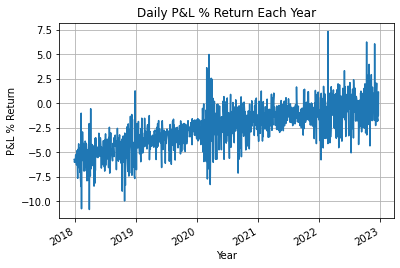

In [27]:
# visualize daily trading P&L percentage results

daily_performance.plot(ylabel='P&L % Return', title='Daily P&L % Return Each Year', xlabel='Year', grid=True)

In [28]:
# group by year and calculate average annual trading P&L percentage

annual_performance = df.groupby(['year'])['daily_P&L_pct'].mean()
print(annual_performance)

year
2017   -5.861255
2018   -5.061503
2019   -3.410380
2020   -2.180740
2021   -1.211905
2022   -0.546087
Name: daily_P&L_pct, dtype: float64


       timestamp       close         low        open        high    volume  \
0     1514298600   85.400002   85.029999   85.309998   85.529999   9891200   
1     1514385000   85.709999   85.220001   85.650002   85.980003  14678000   
2     1514471400   85.720001   85.550003   85.900002   85.930000  10594300   
3     1514557800   85.540001   85.500000   85.629997   86.050003  18717400   
4     1514903400   85.949997   85.500000   86.129997   86.309998  22483800   
...          ...         ...         ...         ...         ...       ...   
1254  1671460200  240.449997  238.710007  244.860001  245.210007  29696400   
1255  1671546600  241.800003  238.419998  239.399994  242.910004  25150800   
1256  1671633000  244.429993  240.110001  241.690002  245.619995  23690600   
1257  1671719400  238.190002  233.869995  241.259995  241.990005  28651700   
1258  1671829204  238.729996  233.942795  236.110001  238.869995  20875477   

        adjclose                date  month  year  daily_P&L_pc

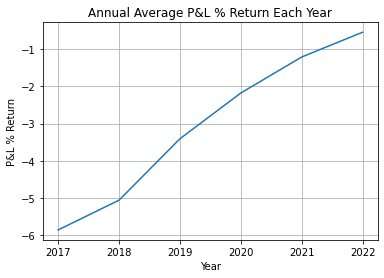

In [29]:
# visualize yearly trading P&L results

annual_performance.plot(ylabel='P&L % Return', title='Annual Average P&L % Return Each Year', xlabel='Year', grid=True)
print(df)

In [30]:
# create date for every row by removing hours and seconds 

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = df['timestamp'].dt.date
df.drop(columns=['timestamp'], inplace=True)

df = df[['date'] + [col for col in df.columns if col != 'date']]

print(df)

            date       close         low        open        high    volume  \
0     2017-12-26   85.400002   85.029999   85.309998   85.529999   9891200   
1     2017-12-27   85.709999   85.220001   85.650002   85.980003  14678000   
2     2017-12-28   85.720001   85.550003   85.900002   85.930000  10594300   
3     2017-12-29   85.540001   85.500000   85.629997   86.050003  18717400   
4     2018-01-02   85.949997   85.500000   86.129997   86.309998  22483800   
...          ...         ...         ...         ...         ...       ...   
1254  2022-12-19  240.449997  238.710007  244.860001  245.210007  29696400   
1255  2022-12-20  241.800003  238.419998  239.399994  242.910004  25150800   
1256  2022-12-21  244.429993  240.110001  241.690002  245.619995  23690600   
1257  2022-12-22  238.190002  233.869995  241.259995  241.990005  28651700   
1258  2022-12-23  238.729996  233.942795  236.110001  238.869995  20875477   

        adjclose  month  year  daily_P&L_pct  
0      80.422462

In [31]:
# create new csv file based on stock parameter populated 
# Please note, the Users name needs to updated to corresponding C: file path 

df.to_csv(r'C:\Users\aaron\Downloads\FinalProject_9650_{}.csv'.format(stock), sep=',', index=False)

In [32]:
print('********Part B, Data Analysis; Linear Regression using Pandas and monthly data********')

********Part B, Data Analysis; Linear Regression using Pandas and monthly data********


In [33]:
#import linear regression packages

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
# Load the data from the CSV files
# Please note, the Users name needs to updated to corresponding C: file path 
# Please note, both files must be saved in the same C: file path 

df_msft = pd.read_csv(r'C:\Users\aaron\Downloads\msft.csv')
df_sp500 = pd.read_csv(r'C:\Users\aaron\Downloads\sp500.csv')

# MSFT monthly dataset
print(df_msft)

          Date   Price    Open    High     Low     Vol. Change %
0   12/01/2022  238.19  249.82  263.84  233.87   28.62M   -6.64%
1   11/01/2022  255.14  235.00  255.14  213.43   27.61M    9.91%
2   10/01/2022  232.13  235.41  251.04  219.13  671.37M   -0.33%
3   09/01/2022  232.90  258.87  267.45  232.73  575.60M  -10.93%
4   08/01/2022  261.47  277.82  294.18  260.66  477.18M   -6.86%
5   07/01/2022  280.74  256.39  282.00  245.94  534.99M    9.31%
6   06/01/2022  256.83  275.20  277.69  241.51  621.50M   -5.53%
7   05/01/2022  271.87  277.71  290.88  246.44  742.90M   -2.04%
8   04/01/2022  277.52  309.37  315.11  270.00  627.39M   -9.99%
9   03/01/2022  308.31  296.40  315.95  270.00  734.35M    3.19%
10  02/01/2022  298.79  310.41  315.12  271.52  697.37M   -3.92%
11  01/01/2022  310.98  335.35  338.00  276.05  947.99M   -7.53%
12  12/01/2021  336.32  335.13  344.30  317.25  625.97M    1.73%
13  11/01/2021  330.59  331.36  349.67  326.37  509.89M   -0.31%
14  10/01/2021  331.62  2

In [35]:
# S&P500 monthly dataset
print(df_sp500)

          Date     Price      Open      High       Low  Vol. Change %
0   12/01/2022  3,822.39  4,089.50  4,103.05  3,764.14   NaN   -6.32%
1   11/01/2022  4,080.11  3,911.50  4,080.11  3,695.60   NaN    5.38%
2   10/01/2022  3,871.98  3,624.07  3,906.05  3,490.00   NaN    7.99%
3   09/01/2022  3,585.62  3,929.90  4,119.69  3,585.40   NaN   -9.34%
4   08/01/2022  3,955.00  4,103.38  4,325.50  3,954.90   NaN   -4.24%
5   07/01/2022  4,130.29  3,779.27  4,140.00  3,720.25   NaN    9.11%
6   06/01/2022  3,785.38  4,156.10  4,177.60  3,636.82   NaN   -8.39%
7   05/01/2022  4,132.15  4,132.70  4,307.90  3,810.50   NaN    0.01%
8   04/01/2022  4,131.93  4,547.90  4,593.90  4,123.87   NaN   -8.80%
9   03/01/2022  4,530.41  4,358.08  4,637.90  4,157.20   NaN    3.58%
10  02/01/2022  4,373.79  4,521.35  4,595.10  4,114.50   NaN   -3.14%
11  01/01/2022  4,515.55  4,781.00  4,817.88  4,221.54   NaN   -5.26%
12  12/01/2021  4,766.18  4,623.80  4,808.52  4,494.20   NaN    4.36%
13  11/01/2021  4,56

In [36]:
# Remove the percentage signs and convert the strings to floats

df_msft['Change %'] = pd.to_numeric(df_msft['Change %'].str.rstrip('%'))

# View the first few rows of the data

df_msft['Change %'].head()

0    -6.64
1     9.91
2    -0.33
3   -10.93
4    -6.86
Name: Change %, dtype: float64

In [37]:
# Remove the percentage signs and convert the strings to floats

df_sp500['Change %'] = pd.to_numeric(df_sp500['Change %'].str.rstrip('%'))

# View the first few rows of the data

df_sp500['Change %'].head()

0   -6.32
1    5.38
2    7.99
3   -9.34
4   -4.24
Name: Change %, dtype: float64

In [38]:
# data cut for only percentange change

change_percentage_MSFT = df_msft[['Change %']]
change_percentage_MSFT.head()

,Change %
0,-6.64
1,9.91
2,-0.33
3,-10.93
4,-6.86


In [39]:
# data cut for only percentange change

change_percentage_SP = df_sp500[['Change %']]
change_percentage_SP.head()

,Change %
0,-6.32
1,5.38
2,7.99
3,-9.34
4,-4.24


<AxesSubplot:xlabel='Change %', ylabel='Change %'>

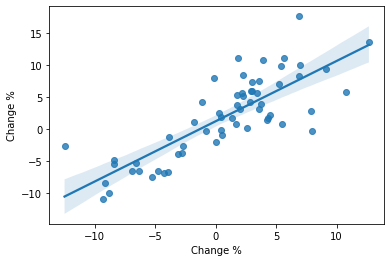

In [40]:
#import seaborn regression library
import seaborn as sns

# Fit the linear regression model
# graph the stock's beta using regression

sns.regplot(x=change_percentage_SP, y=change_percentage_MSFT)

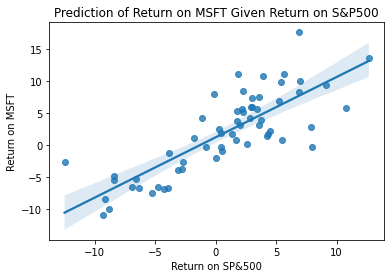

In [41]:
# create labeling and title for regression

import matplotlib.pyplot as plt

# Create the plot
sns.regplot(x=change_percentage_SP, y=change_percentage_MSFT)

# Change the x-axis label
plt.xlabel('Return on SP&500')

# Change the y-axis label
plt.ylabel('Return on MSFT')

#Change the model title
plt.title('Prediction of Return on MSFT Given Return on S&P500')
plt.show()

In [42]:
print("Thank you Professor! Happy Holidays! :)")

Thank you Professor! Happy Holidays! :)
